**End-to-end Machine Learning project**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [1]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


This project requires Python 3.7 or above:

In [2]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Get the Data

*The task is to predict the operation time in a plastic surgery hostpital for each patient, given a number of features based on the patient's individual circumstances.*

*Data dictionary is at the end of the notebook.*

## Download the Data

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

df = pd.read_csv("C:/Users/Tony/Desktop/Code repos/patient.csv")

## Take a Quick Look at the Data Structure

In [5]:
df.head()

,SEX,CPT,ELECTSURG,AGE,HEIGHT,WEIGHT,BMI,HYPERMED,DIALYSIS,DIAB,SMOKE,WNDCLAS,ASACLAS,OPTIME,Plastic,After2014,URR,SSI
0,female,19364,Yes,46,68,211,32.08211,No,No,No,No,1,2,8.8833,1,0,1,1
1,female,19364,Yes,51,62,112,20.48486,No,No,No,No,1,1,8.4500,1,0,0,0
2,female,19364,Yes,48,66,110,17.75428,Yes,No,No,No,1,3,11.9333,1,0,1,1
3,female,19364,Yes,42,63,222,39.32513,No,No,No,No,3,2,10.6833,1,0,0,0
4,female,19364,Yes,35,64,113,19.39621,No,No,No,No,1,2,5.7500,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6148 entries, 0 to 6147
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEX        6148 non-null   object 
 1   CPT        6148 non-null   int64  
 2   ELECTSURG  6148 non-null   object 
 3   AGE        6148 non-null   int64  
 4   HEIGHT     6148 non-null   int64  
 5   WEIGHT     6148 non-null   int64  
 6   BMI        6148 non-null   float64
 7   HYPERMED   6148 non-null   object 
 8   DIALYSIS   6148 non-null   object 
 9   DIAB       6148 non-null   object 
 10  SMOKE      6148 non-null   object 
 11  WNDCLAS    6148 non-null   int64  
 12  ASACLAS    6148 non-null   int64  
 13  OPTIME     6148 non-null   float64
 14  Plastic    6148 non-null   int64  
 15  After2014  6148 non-null   int64  
 16  URR        6148 non-null   int64  
 17  SSI        6148 non-null   int64  
dtypes: float64(2), int64(10), object(6)
memory usage: 864.7+ KB


In [7]:
df.describe()

,CPT,AGE,HEIGHT,WEIGHT,BMI,WNDCLAS,ASACLAS,OPTIME,Plastic,After2014,URR,SSI
count,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.00000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000
mean,18774.277489,51.397528,64.470885,172.151919,29.151391,1.28985,2.371015,8.026773,0.943396,0.748699,0.053513,0.086858
std,1424.910077,11.582654,3.427176,38.132150,6.262224,0.60116,0.592331,2.948908,0.231103,0.433797,0.225073,0.281649
min,15756.000000,9.000000,39.000000,50.000000,8.320351,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19364.000000,44.000000,62.000000,146.000000,24.809010,1.00000,2.000000,6.083300,1.000000,0.000000,0.000000,0.000000
50%,19364.000000,51.000000,64.000000,169.000000,28.568260,1.00000,2.000000,7.908350,1.000000,1.000000,0.000000,0.000000
75%,19364.000000,59.000000,67.000000,194.000000,32.809920,1.00000,3.000000,9.816700,1.000000,1.000000,0.000000,0.000000
max,42894.000000,96.000000,79.000000,387.000000,83.273250,4.00000,4.000000,23.050000,1.000000,1.000000,1.000000,1.000000


The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [8]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

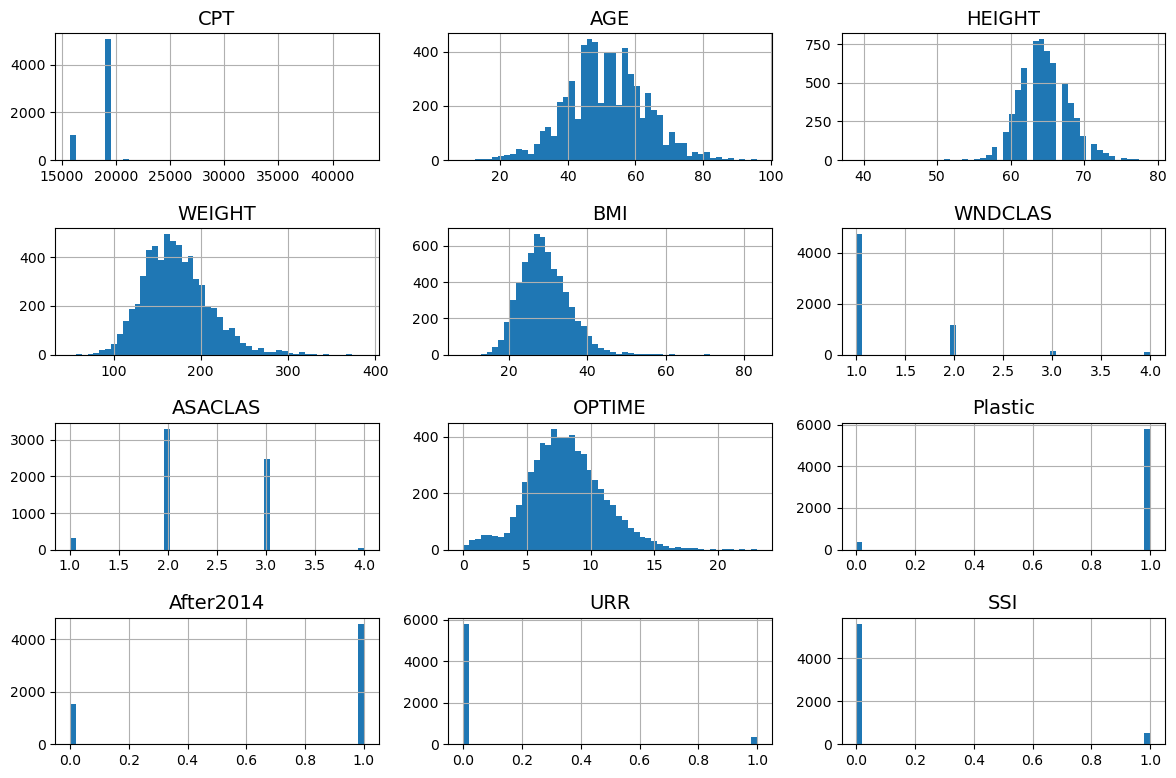

In [9]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

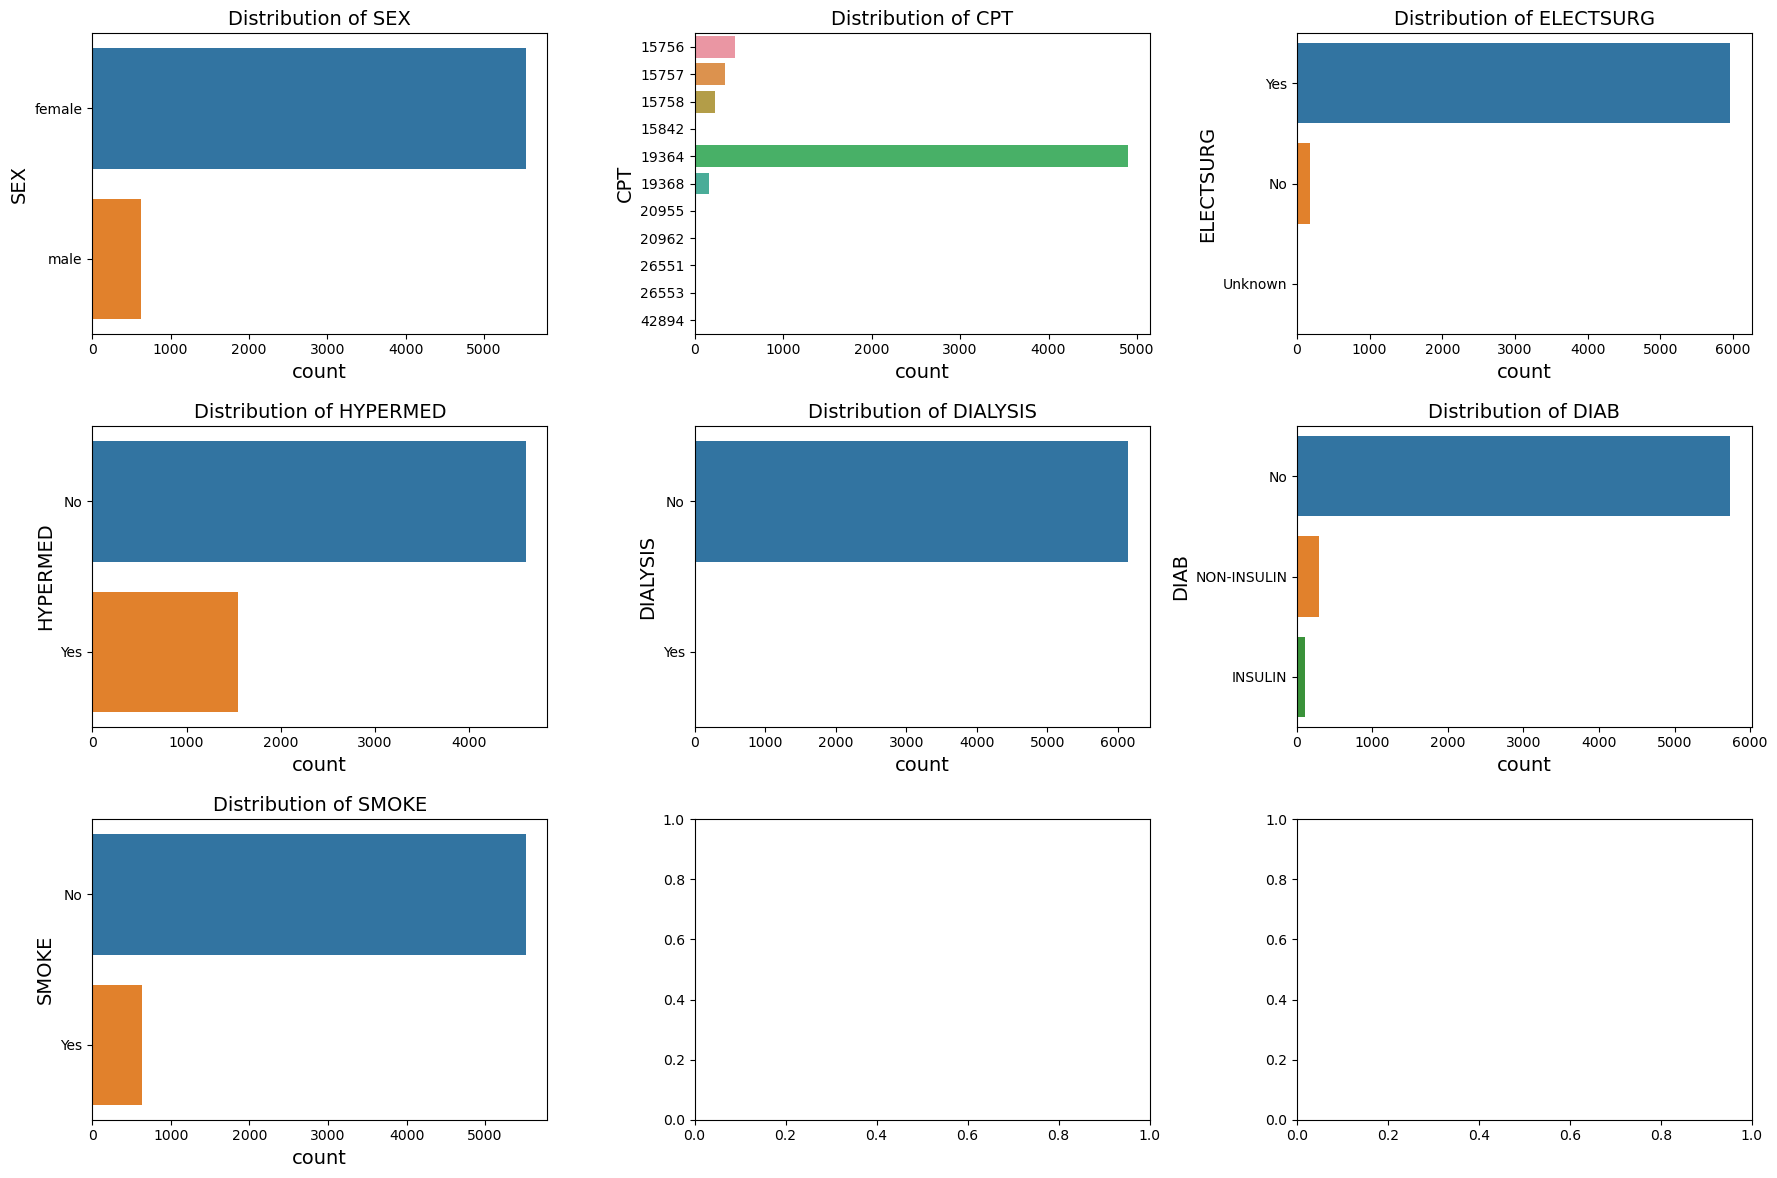

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cat_features = df[['SEX',
'CPT',
'ELECTSURG',
'HYPERMED',
'DIALYSIS',
'DIAB',
'SMOKE'
]]

# Create a grid of subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))  # Adjust the figure size as needed

for i, col in enumerate(cat_features):
    row = i // num_cols
    col_idx = i % num_cols
    sns.countplot(y=col, data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()  # This helps to fit everything neatly
plt.show()


We see that there is no null values in this dataset. Here OPTIME is our target column. Categorical variables dominate the features columns.

## Create a Test Set

In [11]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = shuffle_and_split_data(df, 0.2)
len(train_set)

4919

In [13]:
len(test_set)

1229

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [14]:
np.random.seed(42)

In [15]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
df_with_id = df.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(df_with_id, 0.2, "index")

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_with_id, test_size=0.2, random_state=42)

Let's compare the traditional train_test_split vs the StratifiedShuffleSplit based on the BMI

In [18]:
df["BMI_cat"] = pd.cut(df["BMI"],
                               bins=[0,24, 28, 32, 37., np.inf],
                               labels=[1, 2, 3, 4, 5])

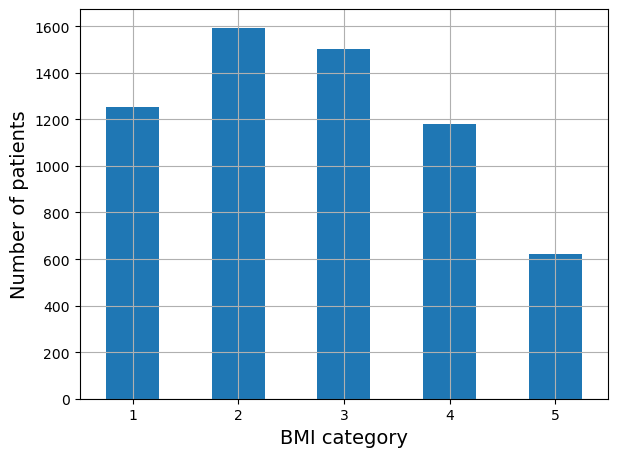

In [19]:
df["BMI_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("BMI category")
plt.ylabel("Number of patients")
save_fig("BMI_cat_bar_plot")  # extra code
plt.show()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(df, df["BMI_cat"]):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [21]:
strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single stratified split:

In [22]:
strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["BMI_cat"], random_state=42)

In [23]:
strat_test_set["BMI_cat"].value_counts() / len(strat_test_set)

2    0.259350
3    0.243902
1    0.204065
4    0.191870
5    0.100813
Name: BMI_cat, dtype: float64

In [24]:
# extra code – computes the data for Figure 2–10

def BMI_cat_proportions(data):
    return data["BMI_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": BMI_cat_proportions(df),
    "Stratified %": BMI_cat_proportions(strat_test_set),
    "Random %": BMI_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "BMI Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
BMI Category,,,,,
1,20.38,20.41,20.33,0.13,-0.27
2,25.93,25.93,24.23,0.03,-6.55
3,24.41,24.39,24.31,-0.10,-0.43
4,19.16,19.19,19.11,0.14,-0.29
5,10.12,10.08,12.03,-0.35,18.93


In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("BMI_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [26]:
df = strat_train_set.copy()

## Visualizing OPTIME VS BMI and AGE

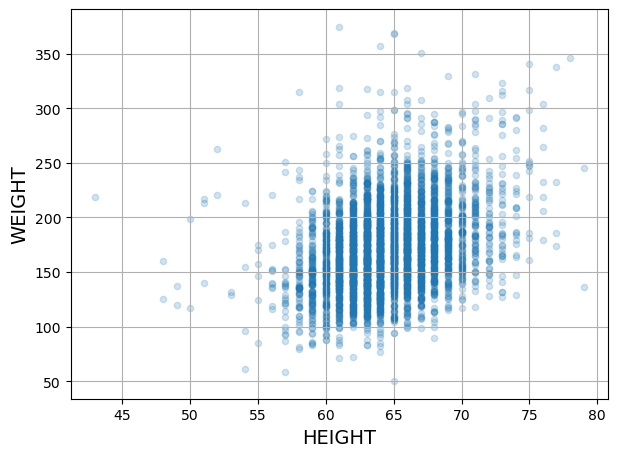

In [27]:
df.plot(kind="scatter", x="HEIGHT", y="WEIGHT", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

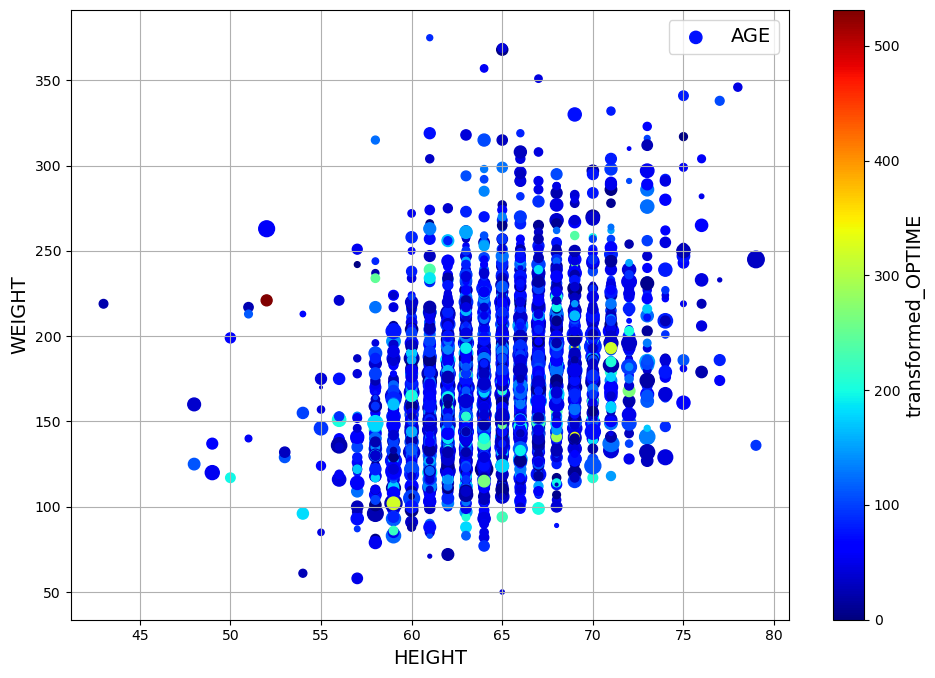

In [28]:
df['transformed_OPTIME'] = df['OPTIME'] ** 2

df.plot(kind="scatter", x="HEIGHT", y="WEIGHT", grid=True,
             s=(df["AGE"]**2)/60, label="AGE",
             c="transformed_OPTIME", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("patients_scatterplot")  # extra code
plt.show()

In [29]:
df = df.drop("transformed_OPTIME", axis=1)

## Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [30]:
corr_matrix = df.corr()

C:\Users\Tony\AppData\Local\Temp\ipykernel_28760\3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [31]:
corr_matrix["OPTIME"].sort_values(ascending=False)

OPTIME       1.000000
URR          0.064044
SSI          0.059559
WNDCLAS      0.008459
CPT          0.003056
AGE         -0.004428
HEIGHT      -0.011320
ASACLAS     -0.013312
BMI         -0.013772
WEIGHT      -0.020764
Plastic     -0.068498
After2014   -0.094090
Name: OPTIME, dtype: float64

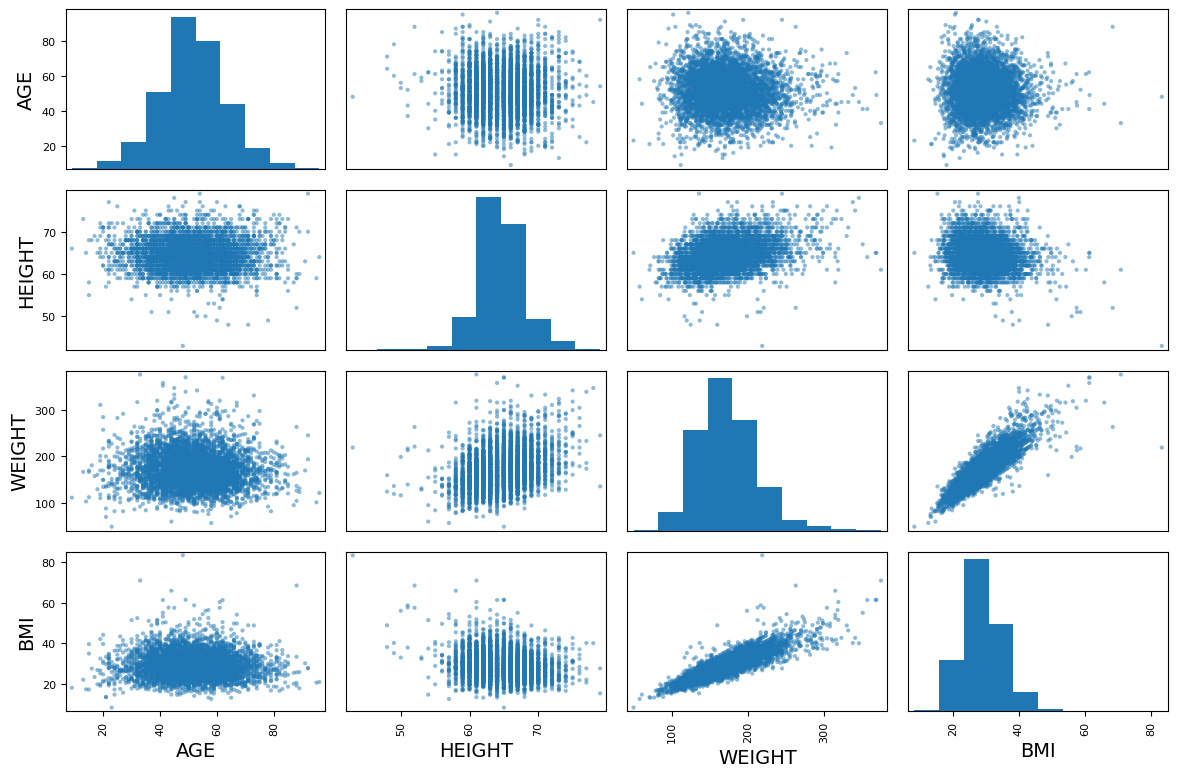

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["AGE", "HEIGHT", "WEIGHT",
              "BMI"]
scatter_matrix(df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

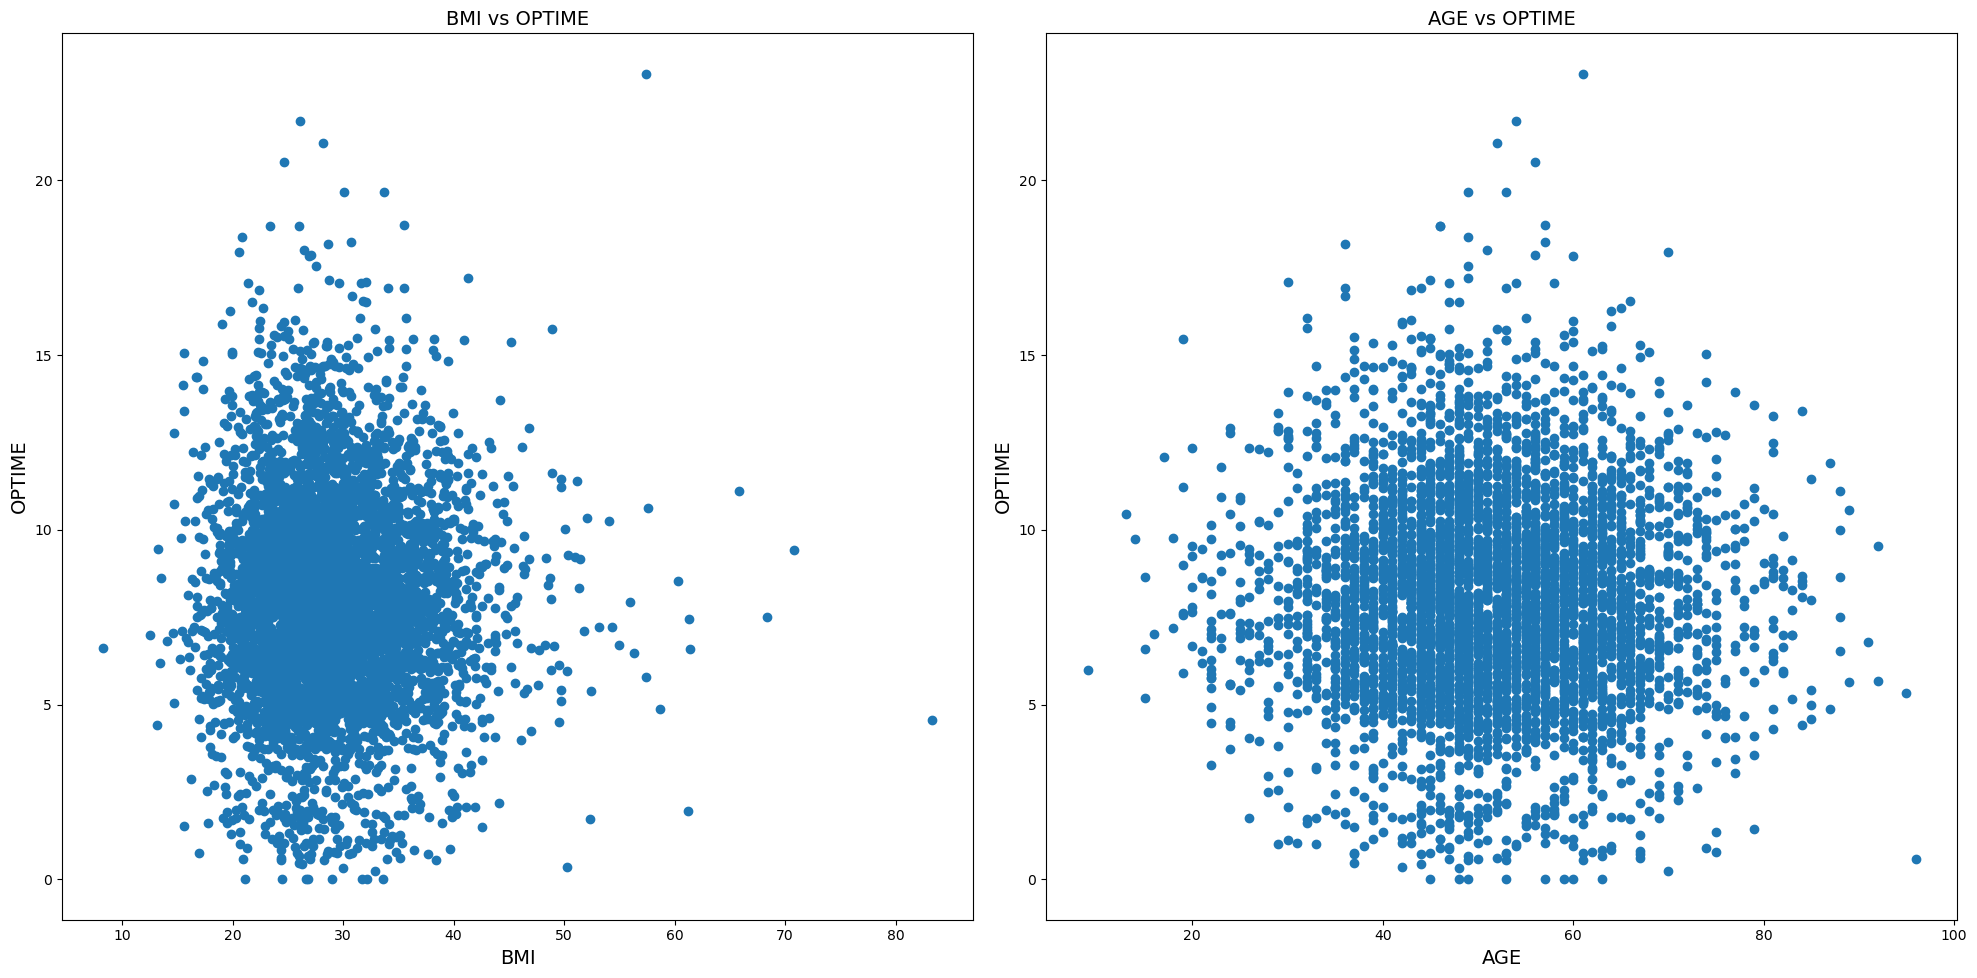

In [33]:
import matplotlib.pyplot as plt

# Sample pairs of continuous variables
# Replace these with your actual pairs of variables
pairs_of_variables = [('BMI', 'OPTIME'), ('AGE', 'OPTIME')]

# Set up the subplot grid
n_rows, n_cols = 1, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10))  # Adjust the figure size as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through the pairs of variables and create scatter plots
for i, (x_var, y_var) in enumerate(pairs_of_variables):
    axs[i].scatter(df[x_var], df[y_var])
    axs[i].set_xlabel(x_var)
    axs[i].set_ylabel(y_var)
    axs[i].set_title(f'{x_var} vs {y_var}')

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axs[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()



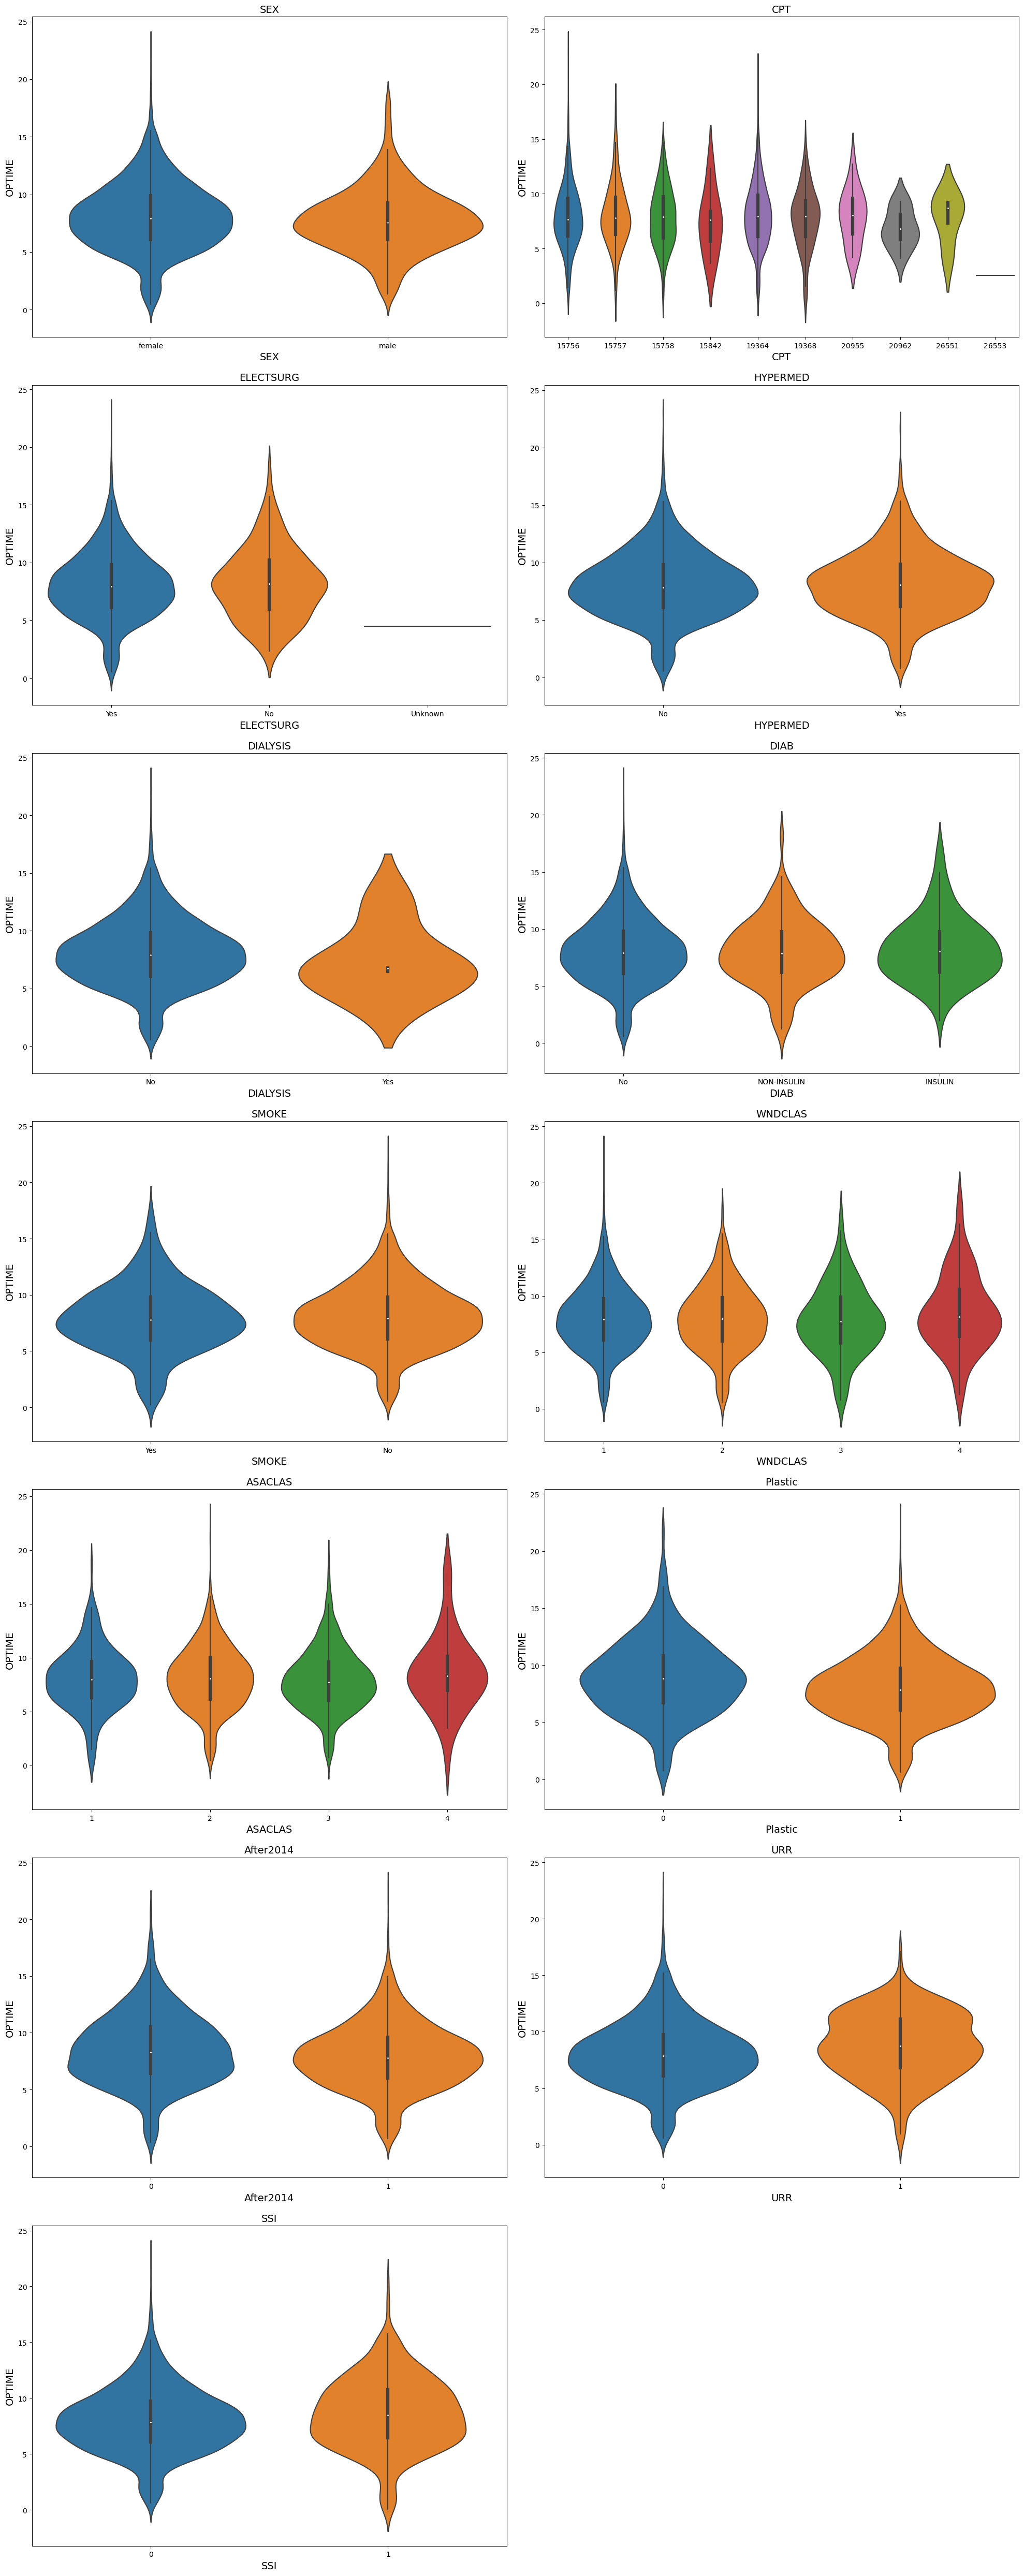

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

binary_variables = ['SEX',
'CPT',
'ELECTSURG',
'HYPERMED',
'DIALYSIS',
'DIAB',
'SMOKE',
'WNDCLAS',
'ASACLAS',
'Plastic',
'After2014',
'URR',
'SSI'
]  # Replace with your variables

# Set up the subplot grid
n_rows, n_cols = 7, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 50))  # Adjust the figure size as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through the binary variables and create violin plots
for i, var in enumerate(binary_variables):
    sns.violinplot(x=var, y='OPTIME', data=df, ax=axs[i])  # Replace 'continuous_variable' with your variable
    axs[i].set_title(var)

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axs[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


# Prepare the Data for Machine Learning Algorithms

In [35]:
#for column ELECTRSURG, there is only one row with value unknow, so we convert it to NO.
df = strat_train_set.copy()
df['ELECTSURG']=df['ELECTSURG'].replace("Unknown","No")
# For some other columns with only binary values , convert to dummy variables.
df['SEX']=df['SEX'].replace({'female': 1, 'male': 0})
df['ELECTSURG']=df['ELECTSURG'].replace({'Yes': 1, 'No': 0})
df['HYPERMED']=df['HYPERMED'].replace({'Yes': 1, 'No': 0})
df['DIALYSIS']=df['DIALYSIS'].replace({'Yes': 1, 'No': 0})
df['SMOKE']=df['SMOKE'].replace({'Yes': 1, 'No': 0})
df['CPT']=df['CPT'].replace({42894: 26551, 26553: 26551})
#in the case for DIAB, we assign the value based on its described seriousness. 
df['DIAB']=df['DIAB'].replace({'NON-INSULIN': 1, 'No': 0, 'INSULIN': 2})

One hot encoding for all the other category variables.

In [36]:
columns_to_encode = ['CPT',
                     'WNDCLAS',
                     'ASACLAS']  
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

df = df_encoded.copy()

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe()

,SEX,ELECTSURG,AGE,HEIGHT,WEIGHT,BMI,HYPERMED,DIALYSIS,DIAB,SMOKE,OPTIME,Plastic,After2014,URR,SSI,CPT_15756,CPT_15757,CPT_15758,CPT_15842,CPT_19364,CPT_19368,CPT_20955,CPT_20962,CPT_26551,WNDCLAS_1,WNDCLAS_2,WNDCLAS_3,WNDCLAS_4,ASACLAS_1,ASACLAS_2,ASACLAS_3,ASACLAS_4
count,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.00000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.00000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000
mean,0.903619,0.970720,51.408906,64.462180,172.088857,29.143478,0.250915,0.001017,0.084791,0.105937,8.030592,0.942253,0.746238,0.053884,0.087434,0.073810,0.05673,0.037617,0.001423,0.796869,0.027247,0.003050,0.002237,0.001017,0.767588,0.190118,0.02379,0.018503,0.051647,0.535990,0.404026,0.008337
std,0.295143,0.168608,11.547276,3.429776,38.202074,6.258986,0.433584,0.031872,0.337971,0.307789,2.950521,0.233288,0.435207,0.225811,0.282499,0.261489,0.23135,0.190287,0.037704,0.402370,0.162818,0.055148,0.047245,0.031872,0.422413,0.392434,0.15241,0.134777,0.221336,0.498754,0.490752,0.090934
min,0.000000,0.000000,9.000000,43.000000,50.000000,8.320351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,44.000000,62.000000,145.000000,24.856000,0.000000,0.000000,0.000000,0.000000,6.083300,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,51.000000,64.000000,169.000000,28.568260,0.000000,0.000000,0.000000,0.000000,7.916700,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,59.000000,67.000000,194.000000,32.784740,1.000000,0.000000,0.000000,0.000000,9.816700,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,96.000000,79.000000,375.000000,83.273250,1.000000,1.000000,2.000000,1.000000,23.050000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df.head()

,SEX,ELECTSURG,AGE,HEIGHT,WEIGHT,BMI,HYPERMED,DIALYSIS,DIAB,SMOKE,OPTIME,Plastic,After2014,URR,SSI,CPT_15756,CPT_15757,CPT_15758,CPT_15842,CPT_19364,CPT_19368,CPT_20955,CPT_20962,CPT_26551,WNDCLAS_1,WNDCLAS_2,WNDCLAS_3,WNDCLAS_4,ASACLAS_1,ASACLAS_2,ASACLAS_3,ASACLAS_4
3479,1,1,41,72,160,21.69968,0,0,0,1,8.6833,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3191,1,1,62,65,141,23.46339,1,0,0,0,10.9167,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
311,1,1,33,63,187,33.12523,1,0,0,0,6.6833,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5707,0,1,45,73,323,42.61428,0,0,0,0,7.8333,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5553,1,1,39,57,92,19.90840,0,0,0,0,8.2167,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


## Experimenting with Attribute Combinations

In [39]:
df["DIAB_SMOKE"] = df["DIAB"] * df["SMOKE"]
df["DIALYSIS_SMOKE"] = df["DIALYSIS"] * df["SMOKE"]
df["BMI_SMOKE"] = df["BMI"] * df["SMOKE"]
df["HYPERMED_SMOKE"] = df["HYPERMED"] * df["SMOKE"]
df["ELECTSURG_PLASTIC"] = df["ELECTSURG"] * df["Plastic"]


In [40]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["OPTIME"].sort_values(ascending=False)

OPTIME               1.000000
URR                  0.064044
SSI                  0.059559
SEX                  0.027224
WNDCLAS_4            0.024233
ASACLAS_2            0.020144
CPT_19364            0.017336
HYPERMED             0.017076
ASACLAS_4            0.017002
HYPERMED_SMOKE       0.013009
CPT_15757            0.008049
DIAB                 0.005519
WNDCLAS_1           -0.000408
DIAB_SMOKE          -0.001235
ASACLAS_1           -0.001340
CPT_20955           -0.002636
WNDCLAS_2           -0.003839
AGE                 -0.004428
ELECTSURG           -0.005299
DIALYSIS            -0.007792
CPT_15842           -0.008283
CPT_15758           -0.008836
CPT_15756           -0.009197
WNDCLAS_3           -0.010415
HEIGHT              -0.011320
BMI                 -0.013772
CPT_26551           -0.014064
SMOKE               -0.014065
CPT_19368           -0.018133
CPT_20962           -0.018898
WEIGHT              -0.020764
ASACLAS_3           -0.023019
BMI_SMOKE           -0.025091
ELECTSURG_

In [41]:
df =df.drop('DIALYSIS_SMOKE',axis = 1)

In [42]:
X = df.drop("OPTIME", axis=1)
df_labels = strat_train_set["OPTIME"].copy()

## Data Cleaning

Since there is no null value in this dataset, we will skip the filling the null step.

Now let's drop some outliers:

In [43]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [44]:
mean = np.mean(outlier_pred)
mean

0.7080113867425782

If you wanted to drop outliers, you would run the following code. In this case, I decided to keep it for now

In [45]:
#df = df.iloc[outlier_pred == 1]
#df_labels = df_labels.iloc[outlier_pred == 1]

## Feature Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
X_min_max_scaled = min_max_scaler.fit_transform(X)

In [47]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X)

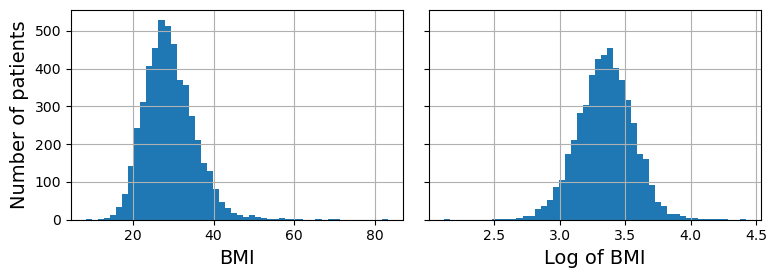

In [48]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["BMI"].hist(ax=axs[0], bins=50)
df["BMI"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("BMI")
axs[1].set_xlabel("Log of BMI")
axs[0].set_ylabel("Number of patients")
save_fig("long_tail_plot")
plt.show()

What if we replace each value with its percentile?

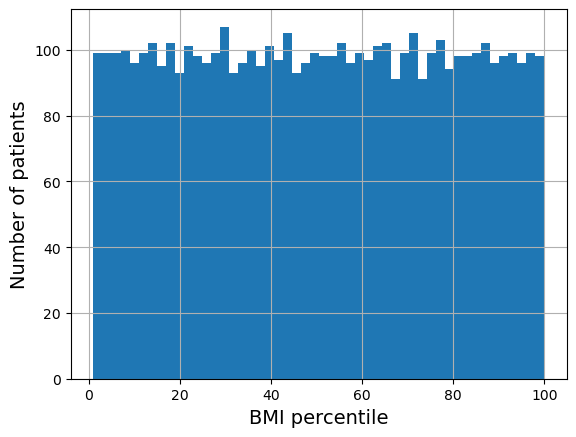

In [49]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(df["BMI"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(df["BMI"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("BMI percentile")
plt.ylabel("Number of patients")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

In [50]:
from sklearn.metrics.pairwise import rbf_kernel

BMI_35 = rbf_kernel(df[["BMI"]], [[22]], gamma=0.1)

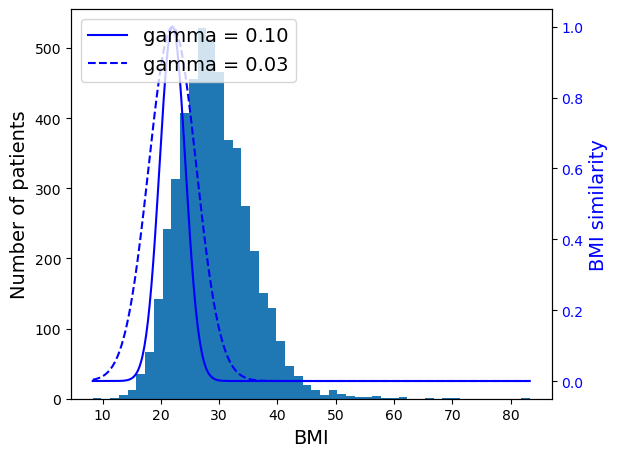

In [51]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(df["BMI"].min(),
                   df["BMI"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[22]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[22]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("BMI")
ax1.set_ylabel("Number of patients")
ax1.hist(df["BMI"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("BMI similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(df_labels.to_frame())

model = LinearRegression()
model.fit(df[["BMI"]], scaled_labels)
some_new_data = df[["BMI"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [53]:
predictions

array([[8.07891954],
       [8.06746886],
       [8.00474051],
       [7.94313399],
       [8.09054921]])

In [54]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(df[["BMI"]], df_labels)
predictions = model.predict(some_new_data)

In [55]:
predictions

array([8.07891954, 8.06746886, 8.00474051, 7.94313399, 8.09054921])

## Custom Transformers

To create simple transformers:

In [56]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_BMI = log_transformer.transform(df[["BMI"]])

In [57]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[22.]], gamma=0.1))
bmi_simil_22 = rbf_transformer.transform(df[["BMI"]])

In [58]:
bmi_simil_22

array([[9.91021341e-01],
       [8.07226461e-01],
       [4.21410108e-06],
       ...,
       [1.73159232e-04],
       [1.12813329e-02],
       [1.12813329e-02]])

In [59]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [61]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

**Warning**:
* There was a change in Scikit-Learn 1.3.0 which affected the random number generator for `KMeans` initialization. Therefore the results will be different than in the book if you use Scikit-Learn ≥ 1.3. That's not a problem as long as you don't expect the outputs to be perfectly identical.
* Throughout this notebook, when `n_init` was not set when creating a `KMeans` estimator, I explicitly set it to `n_init=10` to avoid a warning about the fact that the default value for this hyperparameter will change from 10 to `"auto"` in Scikit-Learn 1.4.

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [62]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [63]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [64]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [65]:
X.head()

,SEX,ELECTSURG,AGE,HEIGHT,WEIGHT,BMI,HYPERMED,DIALYSIS,DIAB,SMOKE,Plastic,After2014,URR,SSI,CPT_15756,CPT_15757,CPT_15758,CPT_15842,CPT_19364,CPT_19368,CPT_20955,CPT_20962,CPT_26551,WNDCLAS_1,WNDCLAS_2,WNDCLAS_3,WNDCLAS_4,ASACLAS_1,ASACLAS_2,ASACLAS_3,ASACLAS_4,DIAB_SMOKE,BMI_SMOKE,HYPERMED_SMOKE,ELECTSURG_PLASTIC
3479,1,1,41,72,160,21.69968,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,21.69968,0,1
3191,1,1,62,65,141,23.46339,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0.00000,0,1
311,1,1,33,63,187,33.12523,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.00000,0,1
5707,0,1,45,73,323,42.61428,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.00000,0,1
5553,1,1,39,57,92,19.90840,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0.00000,0,1


In [66]:
df_num = X[['AGE','HEIGHT','WEIGHT','BMI']]

df_num_prepared = num_pipeline.fit_transform(df_num)
df_num_prepared[:2].round(2)

array([[-0.9 ,  2.2 , -0.32, -1.19],
       [ 0.92,  0.16, -0.81, -0.91]])

In [67]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [68]:
df_num_prepared = pd.DataFrame(
    df_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=df_num.index)

In [69]:
df_num_prepared.head()  

,AGE,HEIGHT,WEIGHT,BMI
3479,-0.901508,2.197982,-0.316477,-1.189419
3191,0.917287,0.156825,-0.813883,-0.907602
311,-1.594383,-0.426363,0.390363,0.636230
5707,-0.555071,2.489576,3.950741,2.152453
5553,-1.074727,-2.175926,-2.096666,-1.475641


In [70]:
common_columns = X.columns.intersection(df_num_prepared.columns)

X[common_columns] = df_num_prepared[common_columns]

In [71]:
if len(bmi_simil_22) == len(X):
    # Attach the array as a new column to X
    X['bmi_simil_22'] = bmi_simil_22
else:
    print("The length of the array does not match the number of rows in X.")
X.head()

,SEX,ELECTSURG,AGE,HEIGHT,WEIGHT,BMI,HYPERMED,DIALYSIS,DIAB,SMOKE,Plastic,After2014,URR,SSI,CPT_15756,CPT_15757,CPT_15758,CPT_15842,CPT_19364,CPT_19368,CPT_20955,CPT_20962,CPT_26551,WNDCLAS_1,WNDCLAS_2,WNDCLAS_3,WNDCLAS_4,ASACLAS_1,ASACLAS_2,ASACLAS_3,ASACLAS_4,DIAB_SMOKE,BMI_SMOKE,HYPERMED_SMOKE,ELECTSURG_PLASTIC,bmi_simil_22
3479,1,1,-0.901508,2.197982,-0.316477,-1.189419,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,21.69968,0,1,9.910213e-01
3191,1,1,0.917287,0.156825,-0.813883,-0.907602,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0.00000,0,1,8.072265e-01
311,1,1,-1.594383,-0.426363,0.390363,0.636230,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.00000,0,1,4.214101e-06
5707,0,1,-0.555071,2.489576,3.950741,2.152453,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.00000,0,1,3.505253e-19
5553,1,1,-1.074727,-2.175926,-2.096666,-1.475641,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0.00000,0,1,6.456620e-01


# Select and Train a Model

## Training and Evaluating on the Training Set

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg =  LinearRegression()
lin_reg.fit(X, df_labels)

LinearRegression()

Let's try the full preprocessing pipeline on a few training instances:

In [73]:
df_predictions = lin_reg.predict(X)
df_predictions[:10]  # -2 = rounded to the nearest hundred

array([8.56462016, 7.75597073, 8.459771  , 7.43696473, 7.83345694,
       7.67363144, 7.92599642, 7.79313513, 7.73874969, 7.88360393])

Compare against the actual values:

In [74]:
df_labels.iloc[:10].values

array([ 8.6833, 10.9167,  6.6833,  7.8333,  8.2167,  7.95  , 10.0167,
        6.6333,  7.3167, 13.6   ])

In [75]:
# extra code – computes the error ratios discussed in the book
error_ratios = df_predictions[:5]/ df_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-1.4%, -29.0%, 26.6%, -5.1%, -4.7%


In [76]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(df_labels, df_predictions,
                              squared=False)
lin_rmse

2.9206384751122956

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, df_labels)

DecisionTreeRegressor(random_state=42)

In [78]:
df_predictions = tree_reg.predict(X)
tree_rmse = mean_squared_error(df_labels, df_predictions,
                              squared=False)
tree_rmse

0.12822680865207703

## Better Evaluation Using Cross-Validation

In [79]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, X, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [80]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      4.253858
std       0.145745
min       4.039548
25%       4.181151
50%       4.229859
75%       4.348009
max       4.496936
dtype: float64

In [81]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, X, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      2.939877
std       0.100264
min       2.716208
25%       2.902862
50%       2.957521
75%       3.009426
max       3.046622
dtype: float64

**Warning:** the following cell may take a few minutes to run:

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg =  RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(forest_reg, X, df_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [83]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      3.092698
std       0.114642
min       2.823709
25%       3.064258
50%       3.124072
75%       3.153235
max       3.224941
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [84]:
forest_reg.fit(X, df_labels)
df_predictions = forest_reg.predict(X)
forest_rmse = mean_squared_error(df_labels, df_predictions,
                                 squared=False)
forest_rmse

1.1572546679726912

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Fine-Tune Your Model

## Grid Search

**Warning:** the following cell may take a few minutes to run:

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree_reg = DecisionTreeRegressor(random_state=42)

# Define the parameter grid to search
param_grid = [
    {'max_depth': [3, 10, None], 
     'min_samples_split': [2, 10, 20], 
     'min_samples_leaf': [1, 5, 10]}
]

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the model
grid_search.fit(X, df_labels)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [3, 10, None],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [87]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [88]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [89]:
# Create a DataFrame from the grid search results
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# Select and rename the relevant columns for easier interpretation
cv_res = cv_res[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 
                 'split0_test_score', 'split1_test_score', 'split2_test_score', 
                 'split3_test_score', 'split4_test_score', 'mean_test_score']]

# Renaming the columns for clarity
score_cols = ['split0', 'split1', 'split2', 'split3', 'split4', 'mean_test_rmse']
cv_res.columns = ['max_depth', 'min_samples_split', 'min_samples_leaf'] + score_cols

# Convert scores to positive values and round
cv_res[score_cols] = -cv_res[score_cols]

cv_res.head()


,max_depth,min_samples_split,min_samples_leaf,split0,split1,split2,split3,split4,mean_test_rmse
6,3,2,10,8.040100,9.017291,8.697263,8.651476,8.912794,8.663785
7,3,10,10,8.040100,9.017291,8.697263,8.651476,8.912794,8.663785
8,3,20,10,8.040100,9.017291,8.697263,8.651476,8.912794,8.663785
5,3,20,5,8.099825,9.041215,8.705866,8.633275,8.924932,8.681023
3,3,2,5,8.099825,9.043096,8.705866,8.633275,8.924932,8.681399


In [90]:
from sklearn.model_selection import cross_val_score


tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10,random_state=42)


tree_rmses = -cross_val_score(tree_reg, X, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [91]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      2.941132
std       0.106676
min       2.714336
25%       2.893990
50%       2.955117
75%       3.012797
max       3.063928
dtype: float64

## Randomized Search

In [92]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

**Warning:** the following cell may take a few minutes to run:

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

tree_reg = DecisionTreeRegressor(random_state=42)

# Define the parameter grid to search
param_grid = [
    {'max_depth': [3, 10, None], 
     'min_samples_split': [2, 10, 20], 
     'min_samples_leaf': [1, 5, 10]}
]


rnd_search = RandomizedSearchCV(
    tree_reg, param_distributions=param_grid, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(X, df_labels)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions=[{'max_depth': [3, 10, None],
                                         'min_samples_leaf': [1, 5, 10],
                                         'min_samples_split': [2, 10, 20]}],
                   random_state=42, scoring='neg_root_mean_squared_error')

In [94]:

# Create a DataFrame from the grid search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# Select and rename the relevant columns for easier interpretation
cv_res = cv_res[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 
                 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score']]

# Renaming the columns for clarity
score_cols = ['split0', 'split1', 'split2', 'mean_test_rmse']
cv_res.columns = ['max_depth', 'min_samples_split', 'min_samples_leaf'] + score_cols

# Convert scores to positive values and round
cv_res[score_cols] = -cv_res[score_cols]

cv_res.head()


,max_depth,min_samples_split,min_samples_leaf,split0,split1,split2,mean_test_rmse
0,3,20,10,2.905246,2.958818,2.995277,2.953114
4,3,2,1,2.930383,3.040676,2.992286,2.987782
6,10,10,10,3.064729,3.080430,3.114431,3.086530
7,10,20,10,3.064729,3.080430,3.114431,3.086530
5,10,20,1,3.174337,3.095588,3.090232,3.120052


## Analyze the Best Models and Their Errors

In [95]:
# Retrieve the best estimator (i.e., the best decision tree model)
final_model = rnd_search.best_estimator_

# Extract feature importances from the decision tree model
feature_importances = final_model.feature_importances_

# Optionally, round the importances for easier interpretation
rounded_importances = feature_importances.round(2)

# Display or use the rounded importances as needed
print(rounded_importances)


[0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.41 0.   0.1
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.   0.
 0.   0.16 0.   0.   0.2  0.   0.   0.  ]


In [96]:
sorted(zip(feature_importances,
           X.columns),
           reverse=True)

[(0.4073793862402924, 'After2014'),
 (0.1965747334666977, 'BMI_SMOKE'),
 (0.15751663454596024, 'ASACLAS_3'),
 (0.10048776892235753, 'SSI'),
 (0.09344527341384869, 'WNDCLAS_3'),
 (0.04459620341084347, 'AGE'),
 (0.0, 'bmi_simil_22'),
 (0.0, 'WNDCLAS_4'),
 (0.0, 'WNDCLAS_2'),
 (0.0, 'WNDCLAS_1'),
 (0.0, 'WEIGHT'),
 (0.0, 'URR'),
 (0.0, 'SMOKE'),
 (0.0, 'SEX'),
 (0.0, 'Plastic'),
 (0.0, 'HYPERMED_SMOKE'),
 (0.0, 'HYPERMED'),
 (0.0, 'HEIGHT'),
 (0.0, 'ELECTSURG_PLASTIC'),
 (0.0, 'ELECTSURG'),
 (0.0, 'DIALYSIS'),
 (0.0, 'DIAB_SMOKE'),
 (0.0, 'DIAB'),
 (0.0, 'CPT_26551'),
 (0.0, 'CPT_20962'),
 (0.0, 'CPT_20955'),
 (0.0, 'CPT_19368'),
 (0.0, 'CPT_19364'),
 (0.0, 'CPT_15842'),
 (0.0, 'CPT_15758'),
 (0.0, 'CPT_15757'),
 (0.0, 'CPT_15756'),
 (0.0, 'BMI'),
 (0.0, 'ASACLAS_4'),
 (0.0, 'ASACLAS_2'),
 (0.0, 'ASACLAS_1')]

## Evaluate Your System on the Test Set

In [97]:
X_test = strat_test_set.drop("OPTIME", axis=1)
y_test = strat_test_set["OPTIME"].copy()

In [98]:
#for column ELECTRSURG, there is only one row with value unknow, so we convert it to NO.
X_test['ELECTSURG']=X_test['ELECTSURG'].replace("Unknown","No")
# For some other columns with only binary values , convert to dummy variables.
X_test['SEX']=X_test['SEX'].replace({'female': 1, 'male': 0})
X_test['ELECTSURG']=X_test['ELECTSURG'].replace({'Yes': 1, 'No': 0})
X_test['HYPERMED']=X_test['HYPERMED'].replace({'Yes': 1, 'No': 0})
X_test['DIALYSIS']=X_test['DIALYSIS'].replace({'Yes': 1, 'No': 0})
X_test['SMOKE']=X_test['SMOKE'].replace({'Yes': 1, 'No': 0})
X_test['CPT']=X_test['CPT'].replace({42894: 26551, 26553: 26551})
#in the case for DIAB, we assign the value based on its described seriousness. 
X_test['DIAB']=X_test['DIAB'].replace({'NON-INSULIN': 1, 'No': 0, 'INSULIN': 2})

columns_to_encode = ['CPT',
                     'WNDCLAS',
                     'ASACLAS']  
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode)

X_test = X_test_encoded.copy()

In [99]:
X_test["DIAB_SMOKE"] = X_test["DIAB"] * X_test["SMOKE"]
X_test["DIALYSIS_SMOKE"] = X_test["DIALYSIS"] * X_test["SMOKE"]
X_test["BMI_SMOKE"] = X_test["BMI"] * X_test["SMOKE"]
X_test["HYPERMED_SMOKE"] = X_test["HYPERMED"] * X_test["SMOKE"]
X_test["ELECTSURG_PLASTIC"] = X_test["ELECTSURG"] * X_test["Plastic"]


In [100]:
df_num = X_test[['AGE','HEIGHT','WEIGHT','BMI']]

df_num_prepared = num_pipeline.fit_transform(df_num)
df_num_prepared[:2].round(2)

df_num_prepared = pd.DataFrame(
    df_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=df_num.index)

common_columns = X_test.columns.intersection(df_num_prepared.columns)

X_test[common_columns] = df_num_prepared[common_columns]

In [101]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[22.]], gamma=0.1))
bmi_simil_22 = rbf_transformer.transform(X_test[["BMI"]])


if len(bmi_simil_22) == len(X_test):
    # Attach the array as a new column to X
    X_test['bmi_simil_22'] = bmi_simil_22
else:
    print("The length of the array does not match the number of rows in X.")

In [102]:
# Ensure X_test has the same columns in the same order as X_train
X_test_aligned = X_test.reindex(columns=X.columns, fill_value=0)

final_predictions = final_model.predict(X_test_aligned)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

2.9303640936326816


We can compute a 95% confidence interval for the test RMSE:

In [103]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.80095105, 3.05429871])

We could compute the interval manually like this:

In [104]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(2.800951053254681, 3.054298714889372)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [105]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(2.801081443080666, 3.0541791355014705)

## Model persistence using joblib

Save the final model:

In [106]:
import joblib

joblib.dump(final_model, "my_patient_model.pkl")

['my_patient_model.pkl']

Now you can deploy this model to production.

## Data Dictionary

SEX: The patient's biological sex (e.g., male, female).

CPT: Current Procedural Terminology, a set of medical codes used to describe medical, surgical, and diagnostic services.

ELECTSURG: Elective Surgery, which is surgery that is scheduled in advance because it does not involve a medical emergency.

AGE: The patient's age at the time of surgery or data collection.

HEIGHT: The patient's height, likely measured in inches or centimeters.

WEIGHT: The patient's weight, likely measured in pounds or kilograms.

BMI: Body Mass Index, a measure of body fat based on height and weight.

HYPERMED: Likely a reference to whether the patient is on medication for hypertension (high blood pressure).

DIALYSIS: Indicates whether the patient is undergoing dialysis, which is a treatment for kidney failure.

DIAB: Indicates whether the patient has diabetes.

SMOKE: Indicates whether the patient is a smoker.

WNDCLAS: Wound Classification, a system to describe the risk of infection in a surgical wound.

ASACLAS: ASA Classification, a system used to assess the fitness of patients before surgery (American Society of
Anesthesiologists Physical Status Classification).

OPTIME: Operating Time, the duration of the surgical procedure.

Plastic: This may refer to whether the surgery is a plastic surgery procedure.

After2014: Likely indicates whether the data was collected after the year 2014.

URR: This could refer to Urea Reduction Ratio, a measure used in dialysis patients to gauge dialysis adequacy.

SSI: Surgical Site Infection, an infection that occurs after surgery in the part of the body where the surgery took place.